# Exploring Racial Demographics and SAT Performance: A Borough-Level Study in New York City
# [1. Project One](#1.-project-one)
- [1.1 Introduction](#1.1-introduction)
- [1.2 Data Cleaning/Loading](#1.2-data-cleaning-loading)
- [1.3 Summary Statistics Tables](#1.3-summary-statistics-tables)
- [1.4 Plots, Histograms, Figures](#1.4-plots-histograms-figures)
# [2. Project Two](#2.-project-two)
- [2.1 The Message](#2.1-the-message)
- [2.2 Maps and Interpretations](#2.2-maps-and-interpretations)
- [2.3 Merging with a New Dataset](#2.3-merging-with-a-new-dataset)
- [2.4 Conclusion](#2.4-conclusion)
- [2.5 Reference](#2.5-reference)

# Project One
## 1.1 Introduction


The impact of student racial demographics on academic accomplishments is widely acknowledged and recognized in the education industry. An extensive examination of the factors affecting learning outcomes is crucial in fostering an equal and inclusive learning environment that encourages students' personal growth and development. Understanding the education disparities among students with various racial backgrounds is essential for policymakers and law enforcers in developing regulations supporting education equity. With such an idea in mind, this study delves into the multifaceted relationship between SAT scores and student racial demographics in New York City. 

To explore the relationship between student racial demographics and academic achievement, I utilize the “Average SAT Scores for NYC Public Schools” dataset from NYC Open Data (NYC Open Data, n.d.). This rich dataset encompasses details of every accredited high school in New York City of the 2014-2015 school year, including school information, demographic breakdown, enrollment numbers, and average SAT scores. Despite New York City being one of the most diverse cities in the US, the city still faces challenges in stopping racial segregation and providing equal access to quality education. (Bonastia, 2023). According to the research by Card and Rothstein (2007), highly segregated cities increase the black-and-white test score gap. Additionally, Penney (2017), noted that the shortage of minority teachers may contribute to the difference in academic performance as students as students perform better with teachers of the same race. 

To avoid confounding factors and offer a more comprehensive view of the education disparities in New York City, this study also examines factors relating to students' racial demographics that may affect their SAT test performances. These factors include school characteristics such as enrollment size and the socioeconomic status where the school is located, characterized by housing prices. Students attending schools in wealthier neighbourhoods are more likely to have wealthier family backgrounds. And according to Everson & Millsap (2004), students' family background both directly and indirectly affect their SAT performances. 

Studies have found public school quality tends to parallel the economic status of their neighbourhood, highlighting the interplay between socioeconomic factors and educational outcomes (Kemple et al., 2019). Using comprehensive information about each school from the dataset, this research aims to unravel the relationship between racial demographics and academic success across different boroughs in New York City. This analysis reveals that higher test scores are more likely to be associated with white or Asian students. From the maps plotted in the study, it is evident that education performances also differ by area, and the differences can both be attributed to economic status measured by housing prices and the students' racial identities. This finding implies that education resources do differ by area. This research seeks to shed light on the long-lasting issue of education disparities existing among students with various backgrounds. Given that New York City’s public school system is the largest by far across the United States, the findings may also have broader implications for education systems across the nation.







## 1.2 Data Cleaning/Loading

I began the paper by loading and cleaning the dataset. The raw dataset contains 435 observations each representing one public high school in New York City. In the dataset, several observations are missing values for both student racial breakdown and SAT score results. After removing the 61 observations with missing values and performing other basic data cleaning procedures on the remaining 374 observations, I created the following new variables in aid of our subsequent analysis: "Total Average Score," "White," "Black," "Hispanic," and "Asian." "Total Average Score" aggregates the sum of Average SAT Math, Reading, and Writing into a single score, on a 2400-point scale. Combining these subscores into a single score simplifies the data analysis. Additionally, I created four variables that represent the percentage (without the percentage sign, scaled out of 100) of the students in each school that belong to specific racial categories. I will use these variables in the subsequent section of the paper. 



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import geopandas as gpd
from shapely.geometry import Point

file = r"C:\Users\35911\Desktop\ECO225 Project\Data\scores.csv"
rawData = pd.read_csv(file)


In [6]:
num_rows = len(rawData) 

In [7]:
# Filter out rows with N/A values
cleaned_score = rawData.dropna()
num_rows_cleaned = len(cleaned_score)

In [8]:
# Removing duplicates
cleaned_score = cleaned_score.drop_duplicates()
num_rows_cleaned = len(cleaned_score)

In [9]:
# Created the sum of average reading, writing, and math scores
cleaned_score['Total Average Score'] = cleaned_score['Average Score (SAT Math)'] + cleaned_score['Average Score (SAT Reading)'] + cleaned_score['Average Score (SAT Writing)']

In [10]:
cleaned_score['White'] = cleaned_score['Percent White'].str.replace('[^\d.]', '', regex=True)
cleaned_score['White'] = cleaned_score['White'].astype(float)
cleaned_score['Black'] = cleaned_score['Percent Black'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Black'] = cleaned_score['Black'].astype(float)
cleaned_score['Hispanic'] = cleaned_score['Percent Hispanic'].str.replace('[^\d.]', '', 
                                                                          regex=True)
cleaned_score['Hispanic'] = cleaned_score['Hispanic'].astype(float)
cleaned_score['Asian'] = cleaned_score['Percent Asian'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Asian'] = cleaned_score['Asian'].astype(float)

## 1.3 Summary Statistics Tables

In my endeavour to assess disparities that affect academic achievement, I selected the dependent variable “Total Average Score” as the metric for gauging student performance. My chosen independent variables in representing student demographics are “White,” “Black,” “Hispanic,” and “Asian.” These four groups are the predominant population in the United States, and together usually comprise more than 95% of the student population in each school. In addition, to investigate the relationship between school size and academic outcomes, I also included the variable “Student Enrollment” in the analysis. 

The "Total Average Score” represents the mean SAT score of the students who took the SAT during the 2014-2015 school year at each school in the dataset. This score is based on the old 2400-point scale, where the SAT Reading, Writing, and Math each contribute 800 points. The average SAT score serves as a reliable indicator of academic performance because of its standardized nature and its reflection on the educational outcomes of students. 

Each of the four variables represents the percentage of students belonging to one of the four main racial demographics in New York City schools (e.g. "White" at 34 means 34% of students in that school are white). Accurately identifying the racial composition of each school is crucial for my investigation into the impact of student demographics on academic achievement. Various studies have shown correlations between students' race and their academic performance in different contexts. Therefore, analyzing the relationship between these demographic variables and SAT scores is a critical initial step in understanding educational disparities.

The variable “Student Enrollment” represents the total number of students enrolled in each school during the 2014-2015 school year. I seek to represent school size with this variable and explore how school size correlates with SAT scores. Factors that influence education outcomes such as resource allocation, class sizes, and overall learning environment may all be correlated with the size of the school. Therefore, including this variable in my analysis is essential for identifying disparities in the educational composite.

In [11]:

# Reorder columns with "Student Enrollment" as the first column
cleaned_score1 = cleaned_score[['Student Enrollment', 'White', 'Black', 
                                'Hispanic', 'Asian', 'Total Average Score']]

# Calculate summary statistics for variables of interest
summary_stats = cleaned_score1.describe()

# Rename columns and add '%' symbol
summary_stats.rename(columns={
    'White': 'White (%)',
    'Black': 'Black (%)',
    'Hispanic': 'Hispanic (%)',
    'Asian': 'Asian (%)',
    'Total Average Score': 'Average SAT Score (out of 2400)'
}, inplace=True)

# Round student enrollment to the nearest whole number
summary_stats['Student Enrollment'] = summary_stats['Student Enrollment'].round()
summary_stats['Average SAT Score (out of 2400)'] = summary_stats['Average SAT Score (out of 2400)'].round()

# Customize styling for the summary statistics table
summary_stats_styled = summary_stats.style.format({
    'White (%)': '{:.1f}', 
    'Black (%)': '{:.1f}', 
    'Hispanic (%)': '{:.1f}', 
    'Asian (%)': '{:.1f}', 
    'Student Enrollment': '{:.0f}',  # Format as whole number
    'Average SAT Score (out of 2400)': '{:.0f}'
})

# Set caption for the table
summary_stats_styled = summary_stats_styled.set_table_attributes('class="dataframe"id="summary-table"')

# Display the styled summary statistics table
summary_stats_styled


,Student Enrollment,White (%),Black (%),Hispanic (%),Asian (%),Average SAT Score (out of 2400)
count,374,374.0,374.0,374.0,374.0,374
mean,756,8.5,35.4,43.9,10.4,1275
std,774,13.4,25.4,24.5,14.4,195
min,142,0.0,0.0,2.6,0.0,924
25%,397,1.3,16.4,20.8,1.6,1157
50%,482,2.6,28.8,45.3,4.2,1226
75%,660,9.4,50.1,63.4,11.1,1327
max,5447,79.9,91.2,100.0,88.9,2144


The summary statistics table provides a comprehensive overview of the variables of interest, including student enrollment, racial demographics (expressed as percentages), and average SAT score. There are in total 374 observations, or schools, in the dataset, which is represented by "count" in the table. And we break down the rest of the table with variables 

With a mean of 756 students per school and a standard deviation of 774, I observe a wide range of enrollment sizes, ranging from 142 to 5447 students. ⁤This wide range indicates significant variability in school size across the dataset, which has a potential impact on average SAT scores. ⁤

⁤With mean percentages ranging from 8.5% for white students to 24.5% for Hispanic students, the racial composition of schools exhibits considerable diversity. The standard deviations ranging from 13.4% for White students to 25.4% for black students highlight considerable diversity in racial demographics among schools. The large standard deviation of 25.4% for black students suggests more pronounced variability in the proportion of Black students across schools compared to other racial groups. 

⁤⁤While New York City is comprised of 30% white individuals, the mean percentage of white students in public schools is the lowest. This scenario can be explained by a high portion of white students choosing to attend private schools as the US Department of Education reports that while only 14% of schools in New York City are private, 40% of its students are white (Di et al., 2021). Similar observations can be made toward Asian students as well: while 16% of public school students are Asian, they represent 62% of the students in specialized private schools (Harris & Hu, 2018). The diverse racial composition of schools underscores the importance of considering demographic factors in analyzing SAT scores. ⁤⁤Racial demographic variabilities suggest underlying differences in socioeconomic backgrounds, educational resources, and cultural influences that may affect academic achievement. ⁤

⁤The wide range of average SAT scores from 924 to 2144 highlights disparities in academic achievement across schools. While the highest average score reaches 2144, the mean score of 1275 falls significantly lower. This distinction prompts us to question the factors contributing to such a gap. This paper attempts to address this question by examining various factors, including student racial demographics, school location, and school size.


## 1.4 Plots, Histograms, Figures

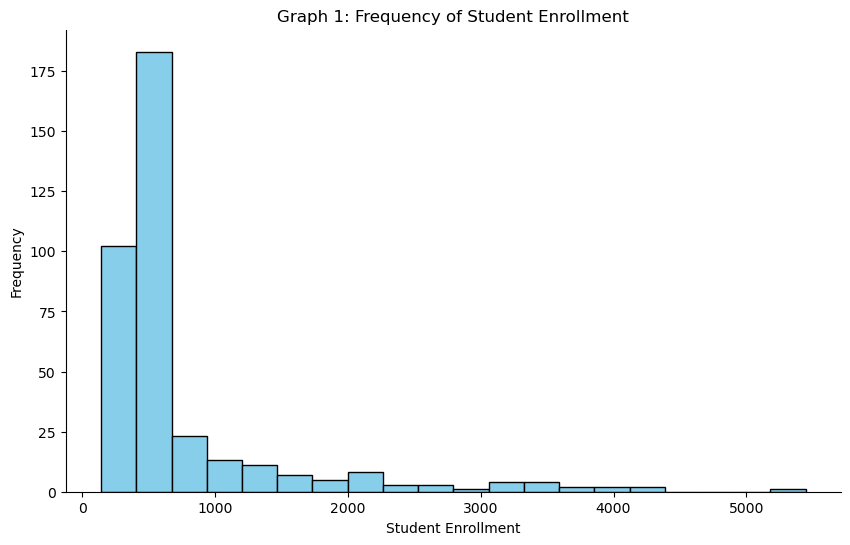

In [11]:

# Extract student enrollment values
enrollment_values = cleaned_score['Student Enrollment'].tolist()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(enrollment_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Graph 1: Frequency of Student Enrollment')
plt.xlabel('Student Enrollment')
plt.ylabel('Frequency')
# Turn off right and top axes
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(False)
plt.show()


To better understand the associations between our variables of interest, we proceed to plot the following graphs. Our first graph "Frequency of Student Enrollment" lays out the distribution of the number of students at each school. We notice a majority of schools with less than 1000 students. While most schools are relatively smaller, this histogram does show that there are some exception schools with thousands or even more than 5000 students in the school, demonstrating significant variability in school sizes.


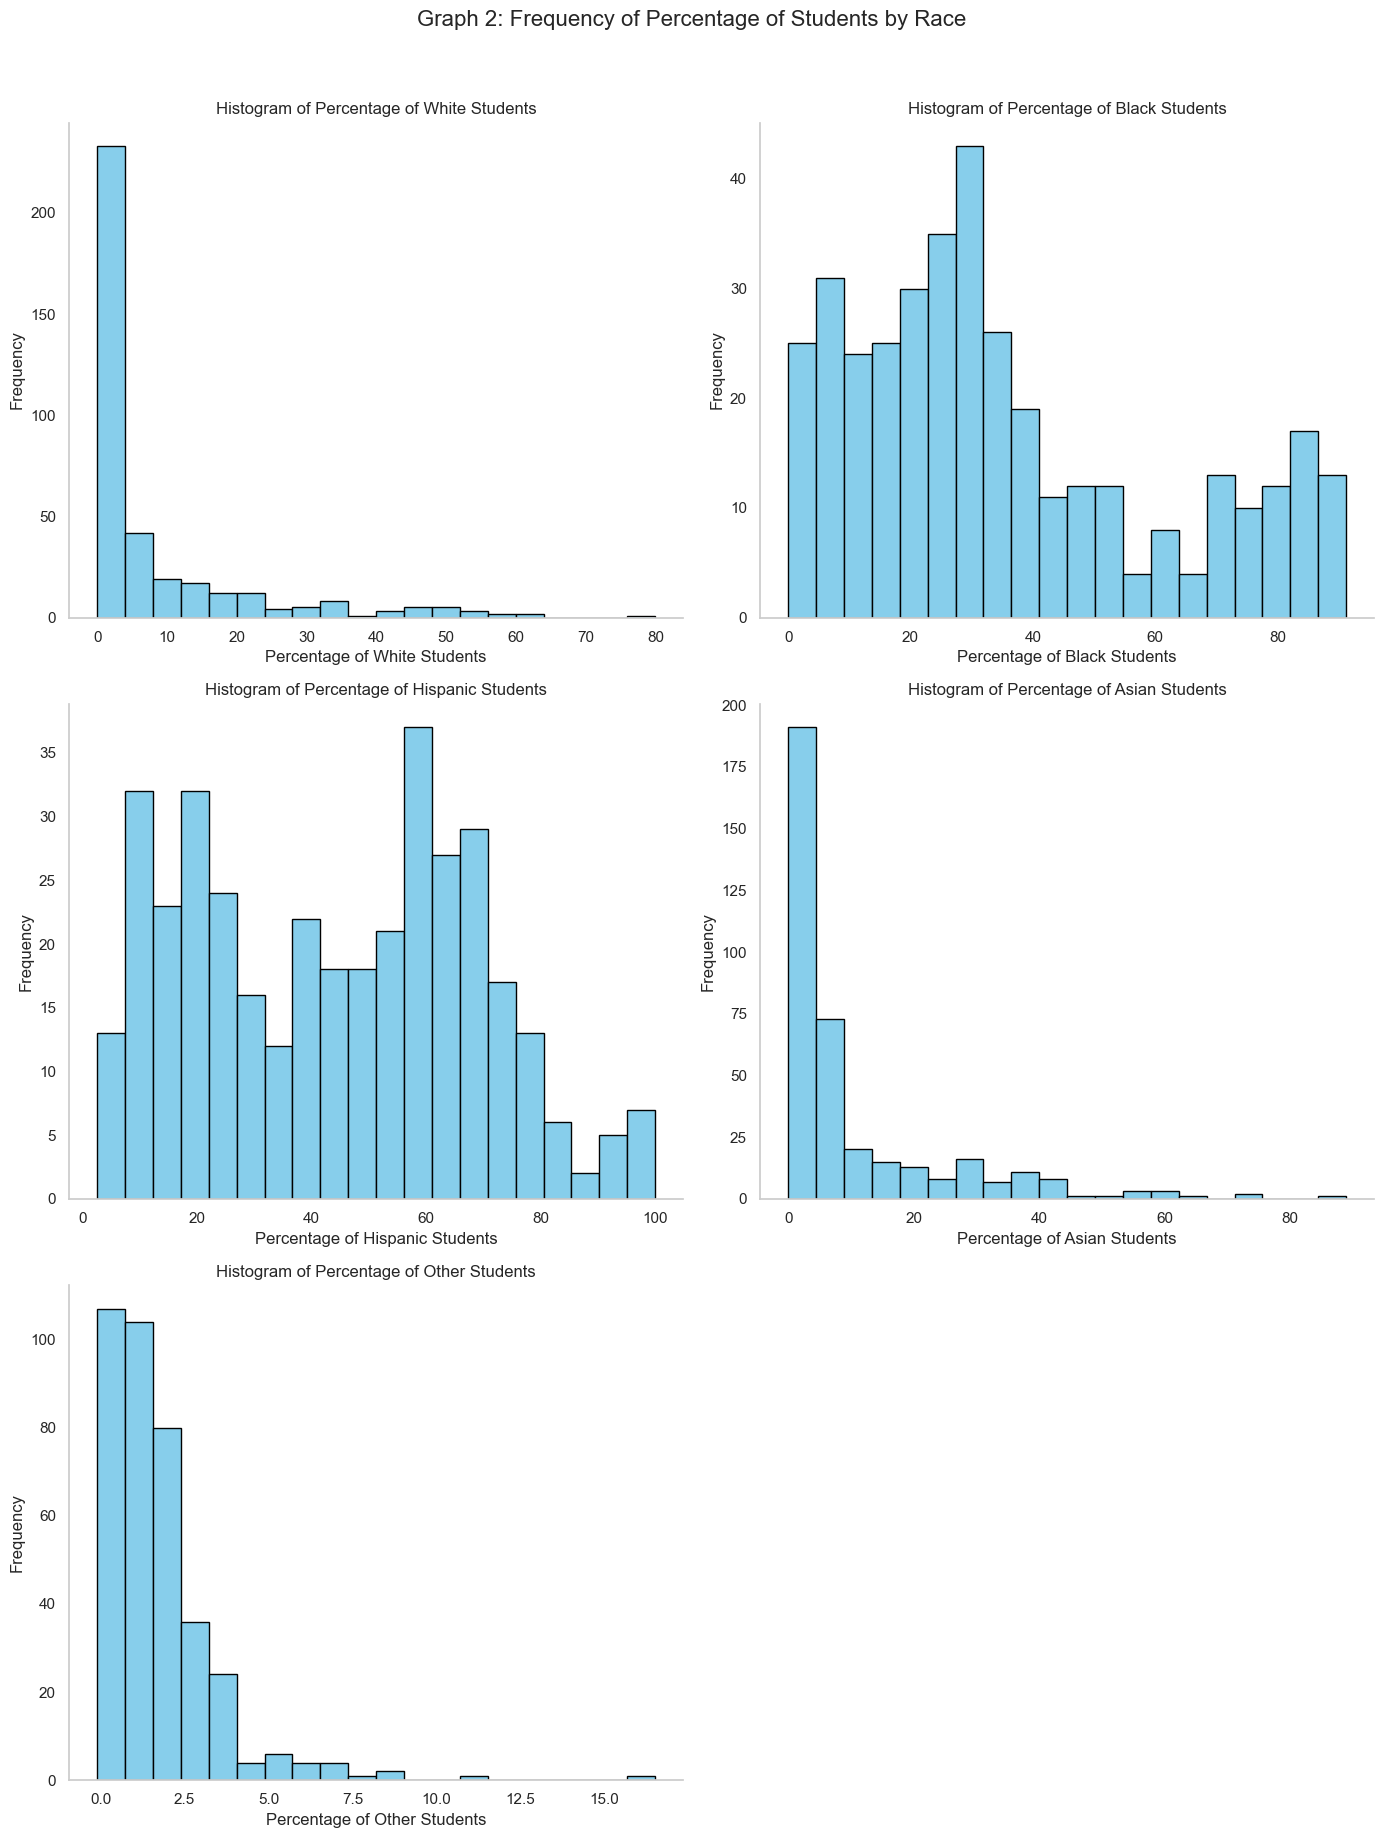

In [30]:

# Create race "other" which includes students that are not white, black, Hispanic, or Asian. 
cleaned_score['Other'] = (100 - cleaned_score['White'] - 
                          cleaned_score['Black'] - 
                          cleaned_score['Hispanic'] - 
                          cleaned_score['Asian'] )

# Extract all values of the "Other" race variable
other_values = cleaned_score['Other'].tolist()

# Set plot style
sns.set(style="whitegrid")

# Define the order of boroughs
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# Plot boxplots for each demographic group

axs[0, 0].hist(cleaned_score['White'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Percentage of White Students')
axs[0, 0].set_xlabel('Percentage of White Students')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(False)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)

axs[0, 1].hist(cleaned_score['Black'], bins=20, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram of Percentage of Black Students')
axs[0, 1].set_xlabel('Percentage of Black Students')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)

axs[1, 0].hist(cleaned_score['Hispanic'], bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Histogram of Percentage of Hispanic Students')
axs[1, 0].set_xlabel('Percentage of Hispanic Students')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(False)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)

axs[1, 1].hist(cleaned_score['Asian'], bins=20, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Histogram of Percentage of Asian Students')
axs[1, 1].set_xlabel('Percentage of Asian Students')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(False)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)

# Plot the histogram of percentage of "Other" students in the bottom row
axs[2, 0].hist(cleaned_score['Other'], bins=20, color='skyblue', edgecolor='black')
axs[2, 0].set_title('Histogram of Percentage of Other Students')
axs[2, 0].set_xlabel('Percentage of Other Students')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].grid(False)
axs[2, 0].spines['right'].set_visible(False)
axs[2, 0].spines['top'].set_visible(False)

# Remove the empty subplot
fig.delaxes(axs[2, 1])
plt.suptitle('Graph 2: Frequency of Percentage of Students by Race', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


To enhance the robustness of the analysis, I construct a new variable out of the existing variables of interest. The variable "Other" represents the percentage of all other students with different races from the four majority races.  This additional variable enriches our analysis by providing insights into the distribution of students from minority racial groups within the dataset. 
 
I then follow the example of graph 1 and generate the following additional graphs with five subplots, each representing a race. Each histogram provides a visual representation of the distribution of students within each racial category across the dataset. From observing the graphs, I notice that both “White” and “Asian” exhibit similar distribution shapes, with the majority of schools having less than 20% representation of these groups. This trend confirms the preference for private schools over public schools among white and Asian communities. 

In contrast, the distribution of black and Hispanic students appears more evenly spread and follows a symmetrical, bell-shaped curve. This observation suggests that black and Hispanic students are more widely represented across schools, with a notable proportion of schools having moderate to high percentages of these groups. 

The shape of "Other" is similar to "White" and "Asian" on a much smaller scale. This finding is expected, considering that the "Other" category represents students from minority racial groups beyond the four major races analyzed. The similarity in distribution suggests a common trend of underrepresentation or lower prevalence of minority racial groups across schools. Due to the small scale of this variable, our subsequent analysis will mainly focus on the other racial variables. 

By examining the frequency distribution, I gain insights into the patterns of different racial groups within the student population. These patterns highlight potential differences in representation across different racial groups as some groups are more prevalent than others. Further exploration of educational access and outcomes among racial groups needs to take the representation differences into account. 

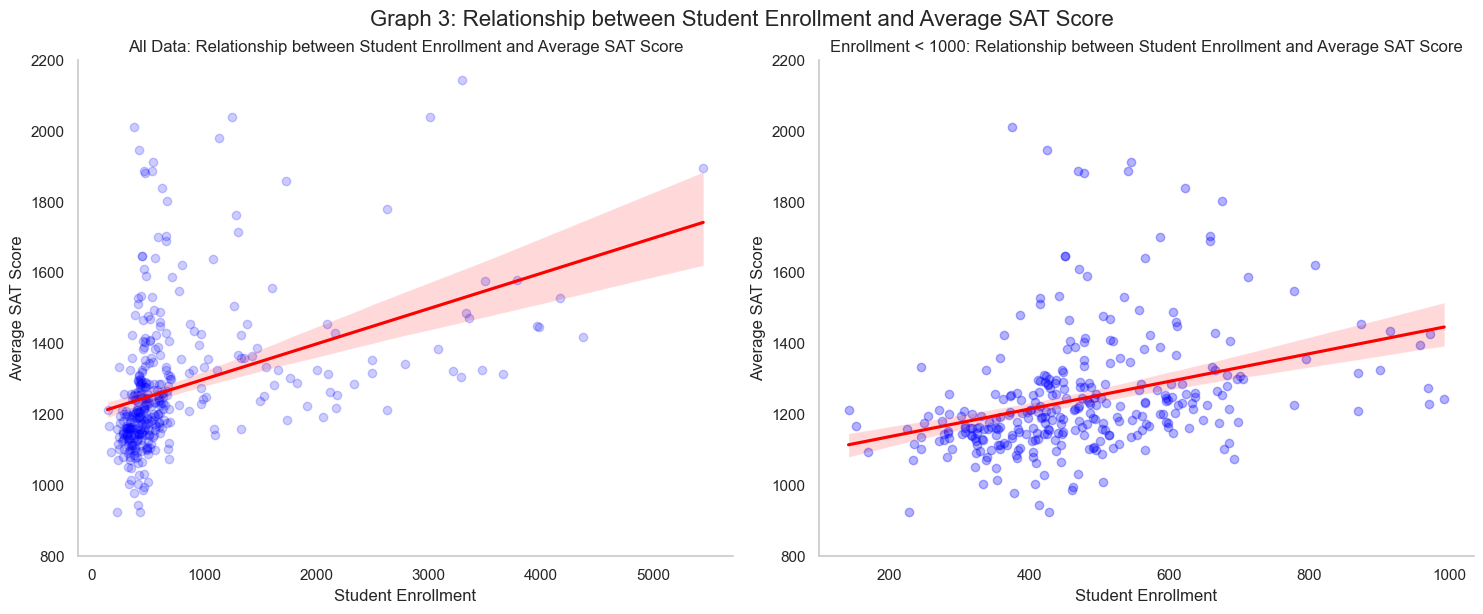

In [31]:
# Set plot style
sns.set(style="whitegrid")

# Filter the dataset for schools with student enrollment less than 1000
filtered_less1000 = cleaned_score[cleaned_score['Student Enrollment'] < 1000]

# Create a figure with two subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create scatter plot with trendline for all data
sns.regplot(x='Student Enrollment', y='Total Average Score', 
            data=cleaned_score, scatter_kws={'alpha': 0.2, 'color': 'blue'}, 
            line_kws={'color': 'red'}, ax=axs[0])

# Set y-axis limits for the first subplot
axs[0].set_ylim(800, 2200)

# Add labels and title for the first subplot
axs[0].set_title('All Data: Relationship between Student Enrollment and Average SAT Score')
axs[0].set_xlabel('Student Enrollment')
axs[0].set_ylabel('Average SAT Score')

# Create scatter plot with trendline for data with enrollment less than 1000
sns.regplot(x='Student Enrollment', y='Total Average Score',
            data=filtered_less1000, scatter_kws={'alpha': 0.3, 'color': 'blue'},
            line_kws={'color': 'red'}, ax=axs[1])

# Set y-axis limits for the second subplot
axs[1].set_ylim(800, 2200)

# Add labels and title for the second subplot
axs[1].set_title('Enrollment < 1000: Relationship between Student Enrollment and Average SAT Score')
axs[1].set_xlabel('Student Enrollment')
axs[1].set_ylabel('Average SAT Score')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove background grid from both subplots
axs[0].grid(False)
axs[1].grid(False)

# Remove top and right spines
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.suptitle('Graph 3: Relationship between Student Enrollment and Average SAT Score', 
             fontsize=16, y=1.02)

# Show the plot
plt.show()


Having examined the general frequency distributions of all our variables of interest, I proceed to study more specific relationships between our dependent variables and independent variables. I began by creating the scatter plot showing the relationship between student enrollment and SAT scores. Since most school sizes are less than 1000 students, I created another plot focusing on schools with less than or equal to 1000 students. Both plots exhibit positive relations between student enrollment and average SAT scores. I can state that there is a general increase in average SAT scores when the school size is larger. The outcome may be attributed to larger schools having better resources such as well-equipped libraries, advanced laboratories, and specialized teachers. Larger schools also can offer a wider range of courses to allow students to expand their knowledge and exercise their critical thinking abilities. Students in larger schools with exposure to these extra resources and opportunities are more likely to have better academic performances. 



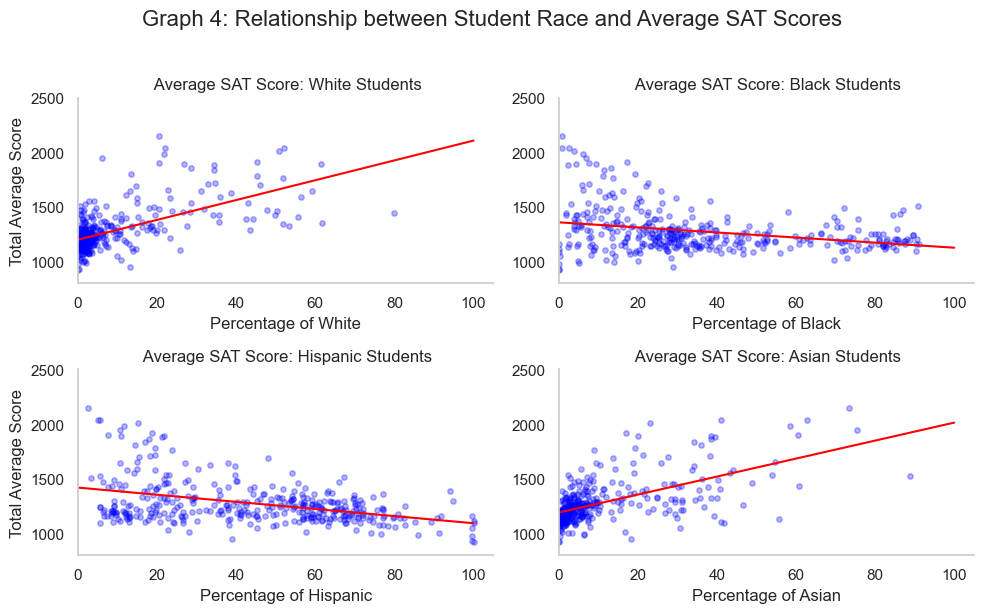

In [126]:
# Create separate scatter plots for each demographic group
plt.figure(figsize=(10, 6))

# Define transparency values for each demographic group
alpha_values = [0.3, 0.3, 0.3, 0.3]  # Adjust as needed

# Loop through each demographic group and plot the scatter plot
for i, demographic_group in enumerate(['White', 'Black', 'Hispanic', 'Asian']):
    ax = plt.subplot(2, 2, i+1)  # Subplot for each demographic group
    
    # Plot scatter plot
    ax.scatter(cleaned_score[demographic_group],
               cleaned_score['Total Average Score'], 
               alpha=alpha_values[i], s=15, color="blue")
    ax.set_title(f' Average SAT Score: {demographic_group} Students')
    ax.set_xlabel(f'Percentage of {demographic_group}')
    
    # Only show y-axis on the first column
    if i % 2 == 0:
        ax.set_ylabel('Total Average Score')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(color='none')

    # Adjust limits
    ax.set_xlim(0, 105)  # Set x-axis limit to 0-105 for all race groups
    ax.set_ylim(800, 2500)  # Set y-axis limit to 800-2500 for all race groups

    # Fit linear regression model
    slope, intercept, _, _, _ = linregress(cleaned_score[demographic_group], 
                                           cleaned_score['Total Average Score'])
    
    # Plot regression line with similar color to scatter plot
    color = plt.cm.tab10(i)  # Choose color based on index
    x_values = np.linspace(0, 100, 100)
    y_values = slope * x_values + intercept
    ax.plot(x_values, y_values, color='red')
    
plt.suptitle('Graph 4: Relationship between Student Race and Average SAT Scores',
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


To explore the connection between the four racial variables and SAT scores, I generated a series of scatter plots. Notably, the trend observed in our previous analyses persists: white and Asian students tend to exhibit a similar pattern, as do black and Hispanic students.
In these scatter plots, I observe a positive association between these racial groups and academic performance, suggesting schools with a higher proportion of white or Asian students tend to have higher average SAT scores. As indicated by the negative correlation, schools with a higher proportion of black or Hispanic students tend to display lower average SAT scores.

While the first four plots efficiently reveal the general trend of racial factors and academic performance, they cannot capture the overall racial composition of each school and how it relates to academic performance. For example, if a school has a lower percentage of white students but a significant proportion of Asian students, this demographic makeup may not be adequately represented in the individual racial categories. I will further delve deeper into these dynamics in the Message section where I combined white and Asian students into one group, as well as black and Hispanic students into another.


In [12]:
# Calculate the number of students for each race
cleaned_score['White_Students'] = (cleaned_score['White'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Black_Students'] = (cleaned_score['Black'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Hispanic_Students'] = (cleaned_score['Hispanic'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Asian_Students'] = (cleaned_score['Asian'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Other_Students'] = (cleaned_score['Other'] * cleaned_score['Student Enrollment']) / 100


KeyError: 'Other'

In [ ]:
# Sum the number of students for each race
total_students_by_race = cleaned_score[['White_Students', 'Black_Students', 'Hispanic_Students', 'Asian_Students', 'Other_Students']].sum()


In [36]:
# Group the data by borough and sum the number of students for each race
total_students_by_borough = cleaned_score.groupby('Borough')[['White_Students', 'Black_Students', 'Hispanic_Students', 'Asian_Students', 'Other_Students']].sum()


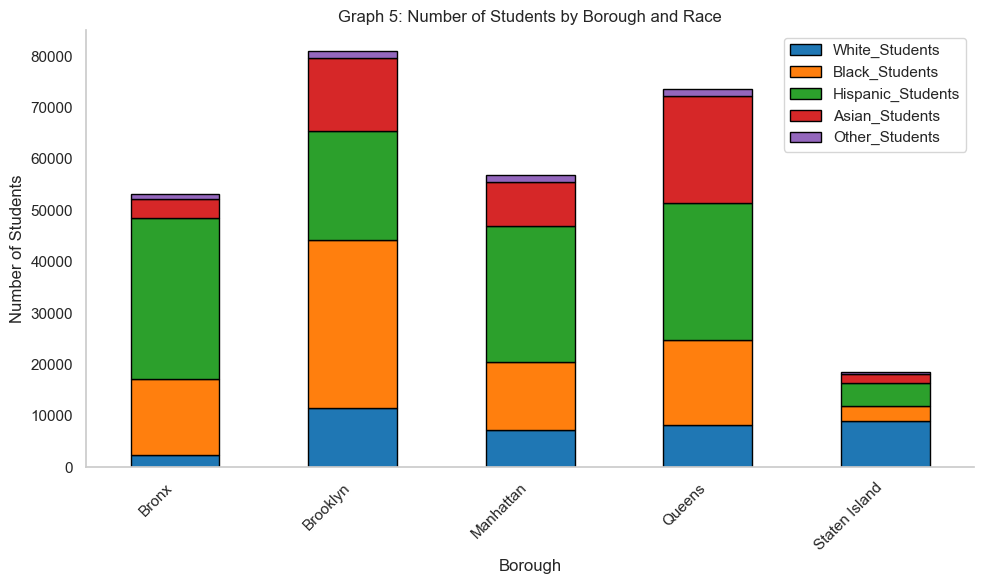

In [37]:

# Define colors for each race
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Blue, Orange, Green, Red, Purple

# Group the data by borough and sum the number of students for each race
total_students_by_borough_race = cleaned_score.groupby('Borough')[['White_Students', 'Black_Students', 'Hispanic_Students', 'Asian_Students', 'Other_Students']].sum()

# Plot the stacked bar graph
plt.figure(figsize=(10, 6))
total_students_by_borough_race.plot(kind='bar', stacked=True, edgecolor='black', ax=plt.gca(), color=colors)
plt.title('Graph 5: Number of Students by Borough and Race')
plt.xlabel('Borough')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Remove grid
plt.grid(False)
plt.show()



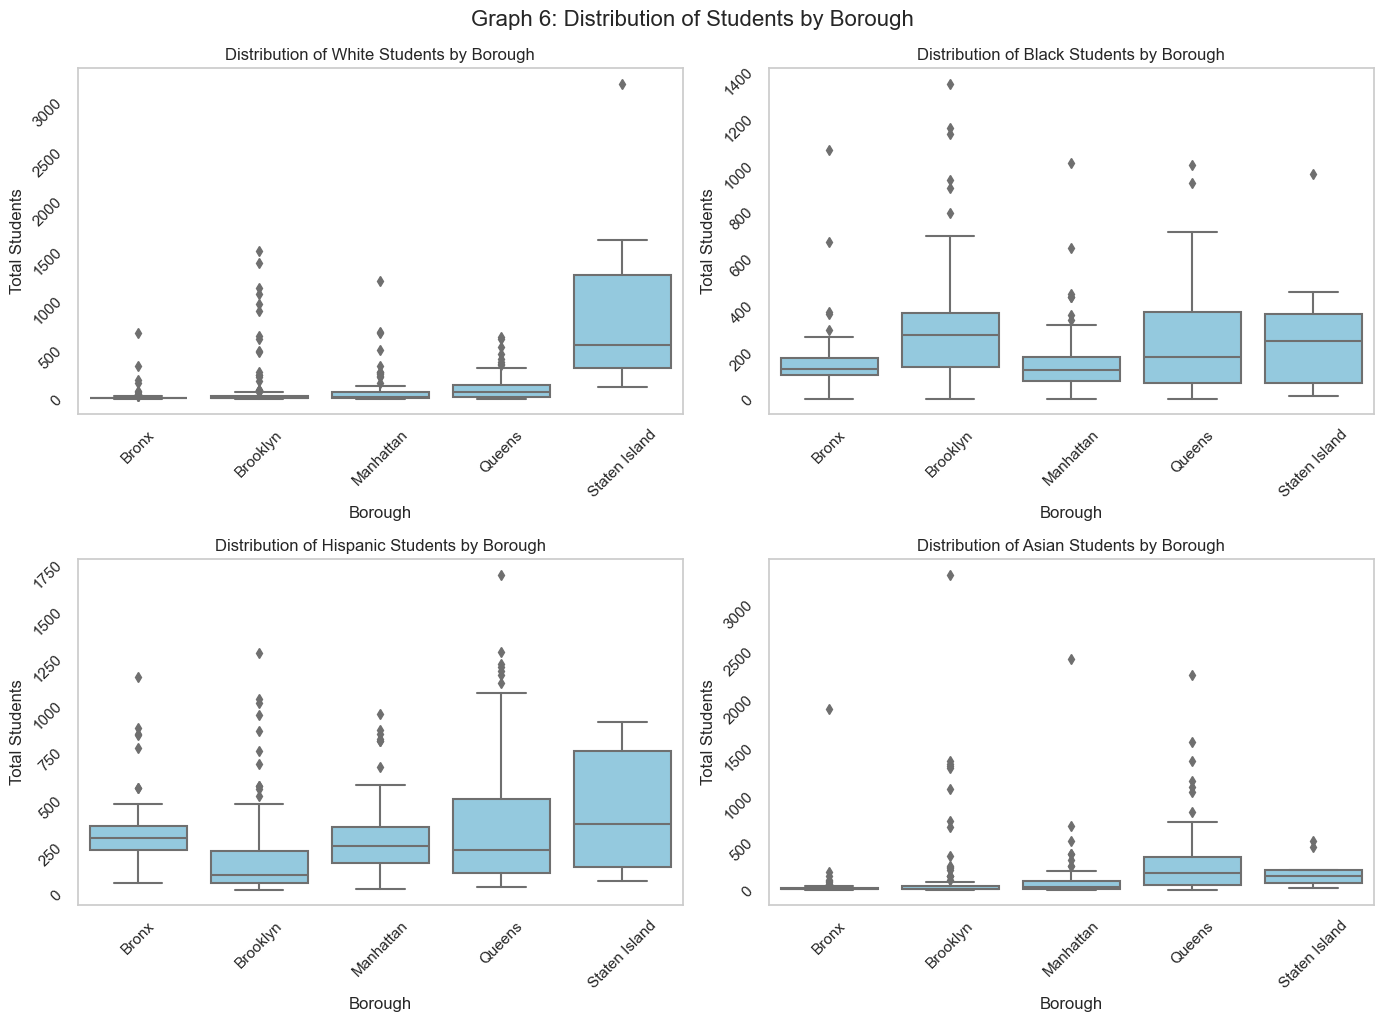

In [38]:

# Set plot style
sns.set(style="whitegrid")

# Define the order of boroughs
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot boxplots for each demographic group
sns.boxplot(ax=axs[0, 0], x='Borough', y='White_Students', data=cleaned_score, color='skyblue', order=borough_order)
axs[0, 0].set_title('Distribution of White Students by Borough')
axs[0, 0].set_xlabel('Borough')
axs[0, 0].set_ylabel('Total Students')
axs[0, 0].tick_params(rotation=45)
axs[0, 0].grid(False)

sns.boxplot(ax=axs[0, 1], x='Borough', y='Black_Students', data=cleaned_score, color='skyblue', order=borough_order)
axs[0, 1].set_title('Distribution of Black Students by Borough')
axs[0, 1].set_xlabel('Borough')
axs[0, 1].set_ylabel('Total Students')
axs[0, 1].tick_params(rotation=45)
axs[0, 1].grid(False)

sns.boxplot(ax=axs[1, 0], x='Borough', y='Hispanic_Students', data=cleaned_score, color='skyblue', order=borough_order)
axs[1, 0].set_title('Distribution of Hispanic Students by Borough')
axs[1, 0].set_xlabel('Borough')
axs[1, 0].set_ylabel('Total Students')
axs[1, 0].tick_params(rotation=45)
axs[1, 0].grid(False)

sns.boxplot(ax=axs[1, 1], x='Borough', y='Asian_Students', data=cleaned_score, color='skyblue', order=borough_order)
axs[1, 1].set_title('Distribution of Asian Students by Borough')
axs[1, 1].set_xlabel('Borough')
axs[1, 1].set_ylabel('Total Students')
axs[1, 1].tick_params(rotation=45)
axs[1, 1].grid(False)

plt.tight_layout()
plt.suptitle('Graph 6: Distribution of Students by Borough',
             fontsize=16, y=1.02)
plt.show()


New York City comprises five governing boroughs: the Bronx, Brooklyn, Manhattan, Queens, and Staten Island (Boroughs of New York City, 2020). Each borough exhibits distinct socioeconomic status, with Manhattan typically leading in income and economic wealth, wealthier areas often possess more resources to invest in public school education. Studies have consistently demonstrated that students with wealthy backgrounds tend to have a significant advantage in scoring higher on standardized tests such as the SAT (gazetteterrymurphy, 2023). Therefore, conducting an extensive analysis of education disparities needs to consider the geographical location of schools. Therefore, I present Graph 5, which provides a breakdown of the number of students by borough and by race and Graph 6, which provides the distribution of students by borough in four boxplots. 
I notice some patterns in different racial groups. White students are more prevalent in Brooklyn and less so in the Bronx. Even though Staten Island has the smallest amount of student population, almost half of its students are white. Brooklyn is also the borough with the most amount of black students, while Staten Island has the least number of black students. Hispanic students show a slight preference for the Bronx, while similar to black students, dislike Staten Island. Asians on the other hand take over Queens and are the least prevalent in Staten Island. 

The boxplots reveal similar distributions for both white and Asian students, as well as for black and Hispanic students, across different boroughs. In most cases, the median number of students in each racial group per borough hovers around 200, indicating a relatively consistent representation. However, Staten Island stands out with a notably higher median of over 500 for white students. 

Additionally, across all boroughs except Staten Island, there are notable outliers representing large schools with a significant number of students from a particular racial group. These outliers suggste thae certain schools have a substantially higher enrollment of students belonging to a specific racial category compared to others in the same borough.

 

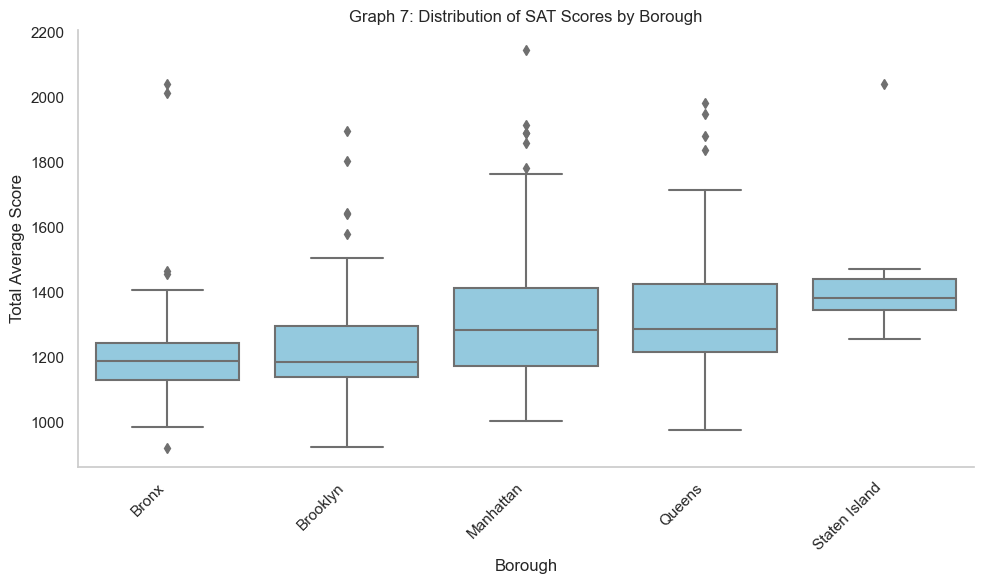

In [39]:

# Set plot style
sns.set(style="whitegrid")
# Define the order of boroughs
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Borough', y='Total Average Score', data=cleaned_score, color='skyblue', order = borough_order)
plt.title('Graph 7: Distribution of SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
# Remove grid
plt.show()

Lastly, I present a boxplot showing the distribution of SAT scores across different boroughs. Given the variation in education resources across areas, I aim to observe the direct differences in educational outcomes among boroughs. From the plot, it becomes evident that one Manhattan school exhibits the highest average SAT scores, while Bronx school records the lowest. This finding matches our previous analysis where areas with more white and Asian students are prone to higher scores and areas with more black and Hispanic students with lower scores. Notably, Staten Island has the highest median score among all boroughs. This result may be attributed to the high portion of white students in that location, highlighting intriguing disparities in educational achievement across New York City.





# Project Two
## 2.1 The Message

This paper aims to investigate the influence of racial demographics on SAT scores among students in New York City, examining each borough individually. To enhance the reliability of the racial impact analysis, I explore additional factors related to racial demographics such as school characteristics and the socio-economic landscape of each area that may influence SAT performance. 

In [13]:
# Plotting the data
warnings.filterwarnings("ignore")

cleaned_score['White and Asian'] = cleaned_score['White'] + cleaned_score['Asian']
cleaned_score['Black and Hispanic'] = cleaned_score['Black'] + cleaned_score['Hispanic']

# Create a new DataFrame with the combined racial demographics
combined_df = cleaned_score[['White and Asian', 'Black and Hispanic', 'Total Average Score']]

# Plotting the data with regression lines
plt.figure(figsize=(10, 6))

# Scatter plot for White and Asian
sns.regplot(x='White and Asian', y='Total Average Score', data=combined_df, color='blue', label='White & Asian')

# Scatter plot for Black and Hispanic
sns.regplot(x='Black and Hispanic', y='Total Average Score', data=combined_df, color='red', label='Black & Hispanic')

# Adding labels and title
plt.xlabel('Percentage of Students')
plt.ylabel('SAT Score')
plt.title('Graph 8：Relationship between Combined Racial Demographics and SAT Scores')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(False)

# Show plot
plt.show()



NameError: name 'warnings' is not defined

Graph 8 serves as an explanation of our main message regarding the influence of racial demographics on SAT scores in New York City. It substantiates the previous findings from graph 4, which indicated that the academic performance of white and Asian students follows a similar trend to that of black and Hispanic students. Because the racial variables represent percentages and sum up to 100%, they exhibit a strong inverse correlation, showcasing two opposite trends. The percentages of white and Asian students are positively correlated with average SAT scores, whereas the reverse holds true for black and Hispanic students. 

Graph 8 verifies that schools with predominantly white or Asian students score higher on the SATs than schools with larger black or Hispanic populations. This observation highlights the potential impact of racial demographics on academic performance. Socioeconomic status, educational resources, and systemic issues among different racial communities may play roles in these disparities. White and Asian students may benefit from socioeconomic status, cultural influence, and better access to resources and conversely, black and Hispanic students may be less exposed to these advantages.

## 2.2 Maps and Interpretations

In [14]:
! pip install -q qeds fiona geopandas  gensim folium pyLDAvis descartes

In [15]:
# Group cleaned_score by zipcode and calculate the average SAT score for each zipcode
avg_sat_per_zip = cleaned_score.groupby('Zip Code')['Total Average Score'].mean().reset_index().round()
# Rename columns for consistency
avg_sat_per_zip.columns = ['zipcode', 'average_sat_score']

In [16]:
cleaned_score['WhiteAsian'] = cleaned_score['White_Students'] + cleaned_score['Asian_Students']
cleaned_score['BlackHispanic'] = cleaned_score['Black_Students'] + cleaned_score['Hispanic_Students']

In [17]:
import numpy as np
import pandas as gpd
from matplotlib.colors import ListedColormap

In [27]:
import warnings
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load borough data for New York City
nyc_boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))
# Filter to include only New York City boroughs
nyc_boroughs = nyc_boroughs[nyc_boroughs['BoroName'].isin(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])]

# Load zip code data for New York City
nyc_zip_codes = gpd.read_file("C:/Users/35911/Downloads/zip_code_040114.geojson")

# Convert 'ZIPCODE' column in nyc_zip_codes to match the data type of 'zipcode' column in avg_sat_per_zip
nyc_zip_codes['ZIPCODE'] = nyc_zip_codes['ZIPCODE'].astype(int)

# Left merge nyc_zip_codes with avg_sat_per_zip
merged_data = nyc_zip_codes.merge(avg_sat_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')

# Set NaN values to a default color (white)
merged_data['average_sat_score'].fillna(0, inplace=True)

# Define custom colormap
cmap = plt.cm.YlOrBr  # Original colormap
cmap_white = ListedColormap(['white'])  # Custom colormap for value 0 (white)
cmap_combined = ListedColormap(np.vstack((cmap_white(np.linspace(0, 1, 1)), cmap(np.linspace(0, 1, cmap.N-1)))))

# Set the plot extent
xlim = (-74.3, -73.6)
ylim = (40.4, 40.95)

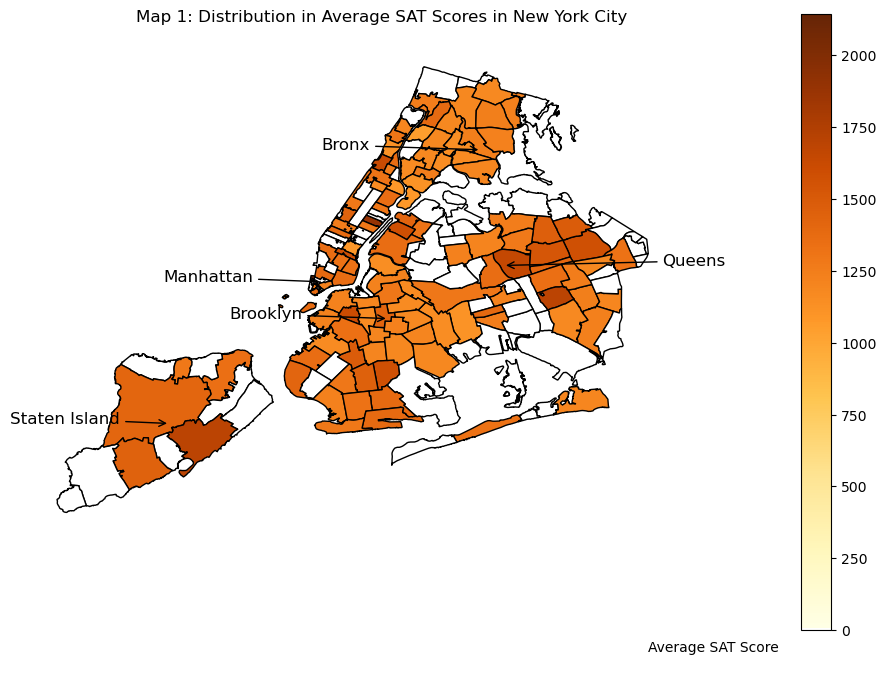

In [28]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('white')  # Set background color of the axis to white
nyc_boroughs.plot(ax=ax, edgecolor="black", facecolor="none")  # Set facecolor to none for the boroughs

# Plot the map with colors based on SAT scores
merged_data.plot(ax=ax, edgecolor="black", column='average_sat_score', cmap=cmap_combined, legend=True)

# Set the plot extent and aspect ratio
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal')
# Add text to let people know what we are plotting
ax.annotate('Average SAT Score',xy=(0.54, 0.05),  xycoords='figure fraction')

borough_coords = {
    'Manhattan': (-74.0059, 40.7128),
    'Brooklyn': (-73.9438, 40.6782),
    'Queens': (-73.836, 40.7282),
    'Bronx': (-73.8567, 40.8370),
    'Staten Island': (-74.1496, 40.5795)
}

# Iterate over each borough and annotate it on the map
for borough, coords in borough_coords.items():
    if borough == 'Queens':
        plt.annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                     arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
    else:
        plt.annotate(borough, xy=coords, xytext=(coords[0] - 0.15, coords[1]), 
                 arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)



plt.title("Map 1: Distribution in Average SAT Scores in New York City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("off")
plt.show()


In this section, I explore the geographical distribution of various variables in New York City, categorized by zip code and borough to increase my understanding and validate the findings from previous analyses. 

I acquired the shapefile representing New York City's zip code boundaries from NYC Zip Code Tabulation Areas (NYC Zip Code Tabulation Areas - ZIP_CODE_040114.Geojson - BetaNYC’s Community Data Portal, n.d.) and proceeded to colour each zip code area based on several variables of interest. By visualizing the data through maps, I aim to uncover any geographical disparities and patterns in these variables across different areas.

Through these maps, I seek to gain insights into the spatial distribution and potential correlations between the variables and different neighbourhoods of New York City. This visualization provides a more comprehensive understanding of the city's dynamics and characteristics

Firstly, Map 1 focuses on the difference in average SAT scores across different zip code areas in New York City. Lighter colours indicate lower average SAT scores, while darker colours represent higher scores. Areas where there is no available public school average SAT data are depicted in white. The largely consistent colour distribution shows that in most areas, the average SAT score ranges from 1250 to 1500. Each of the five boroughs has one or more particular zip code areas that stand out with an average SAT score higher than 1750. An area in Manhattan, notably, exhibits average SAT scores of more than 2000. This finding corresponds with Graph 7 the boxplot which illustrates that the median of SAT scores scattered slightly around the same area with Manhattan having the most prominent outliers. These noticeable outliers are worth additional examination to understand the underlying factors contributing to these disparities.


In [97]:
# Group cleaned_score by zipcode and calculate the sum of white and Asian students for each zipcode
white_per_zip = cleaned_score.groupby('Zip Code')['White_Students'].sum().reset_index().round(0)
# Rename columns for consistency
white_per_zip.columns = ['zipcode', 'White_Students']

# Group cleaned_score by zipcode and calculate the sum of black and Hispanic students for each zipcode
black_per_zip = cleaned_score.groupby('Zip Code')['Black_Students'].sum().reset_index().round(0)
# Rename columns for consistency
black_per_zip.columns = ['zipcode', 'Black_Students']

# Group cleaned_score by zipcode and calculate the sum of black and Hispanic students for each zipcode
hispanic_per_zip = cleaned_score.groupby('Zip Code')['Hispanic_Students'].sum().reset_index().round(0)
# Rename columns for consistency
hispanic_per_zip.columns = ['zipcode', 'Hispanic_Students']

# Group cleaned_score by zipcode and calculate the sum of white and Asian students for each zipcode
asian_per_zip = cleaned_score.groupby('Zip Code')['Asian_Students'].sum().reset_index().round(0)
# Rename columns for consistency
asian_per_zip.columns = ['zipcode', 'Asian_Students']

# Left merge nyc_zip_codes
merged_data_white = nyc_zip_codes.merge(white_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')
merged_data_black = nyc_zip_codes.merge(black_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')
merged_data_asian = nyc_zip_codes.merge(asian_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')
merged_data_hispanic = nyc_zip_codes.merge(hispanic_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')

# Set NaN values to a default color (white)
merged_data_white['White_Students'].fillna(0, inplace=True)
merged_data_black['Black_Students'].fillna(0, inplace=True)
merged_data_asian['Asian_Students'].fillna(0, inplace=True)
merged_data_hispanic['Hispanic_Students'].fillna(0, inplace=True)


# Define custom colormap
cmap = plt.cm.YlOrBr  # Original colormap
cmap_white = ListedColormap(['white'])  # Custom colormap for value 0 (white)
cmap_combined = ListedColormap(np.vstack((cmap_white(np.linspace(0, 1, 1)), cmap(np.linspace(0, 1, cmap.N-1)))))

# Set the plot extent
xlim = (-74.3, -73.6)
ylim = (40.4, 40.95)


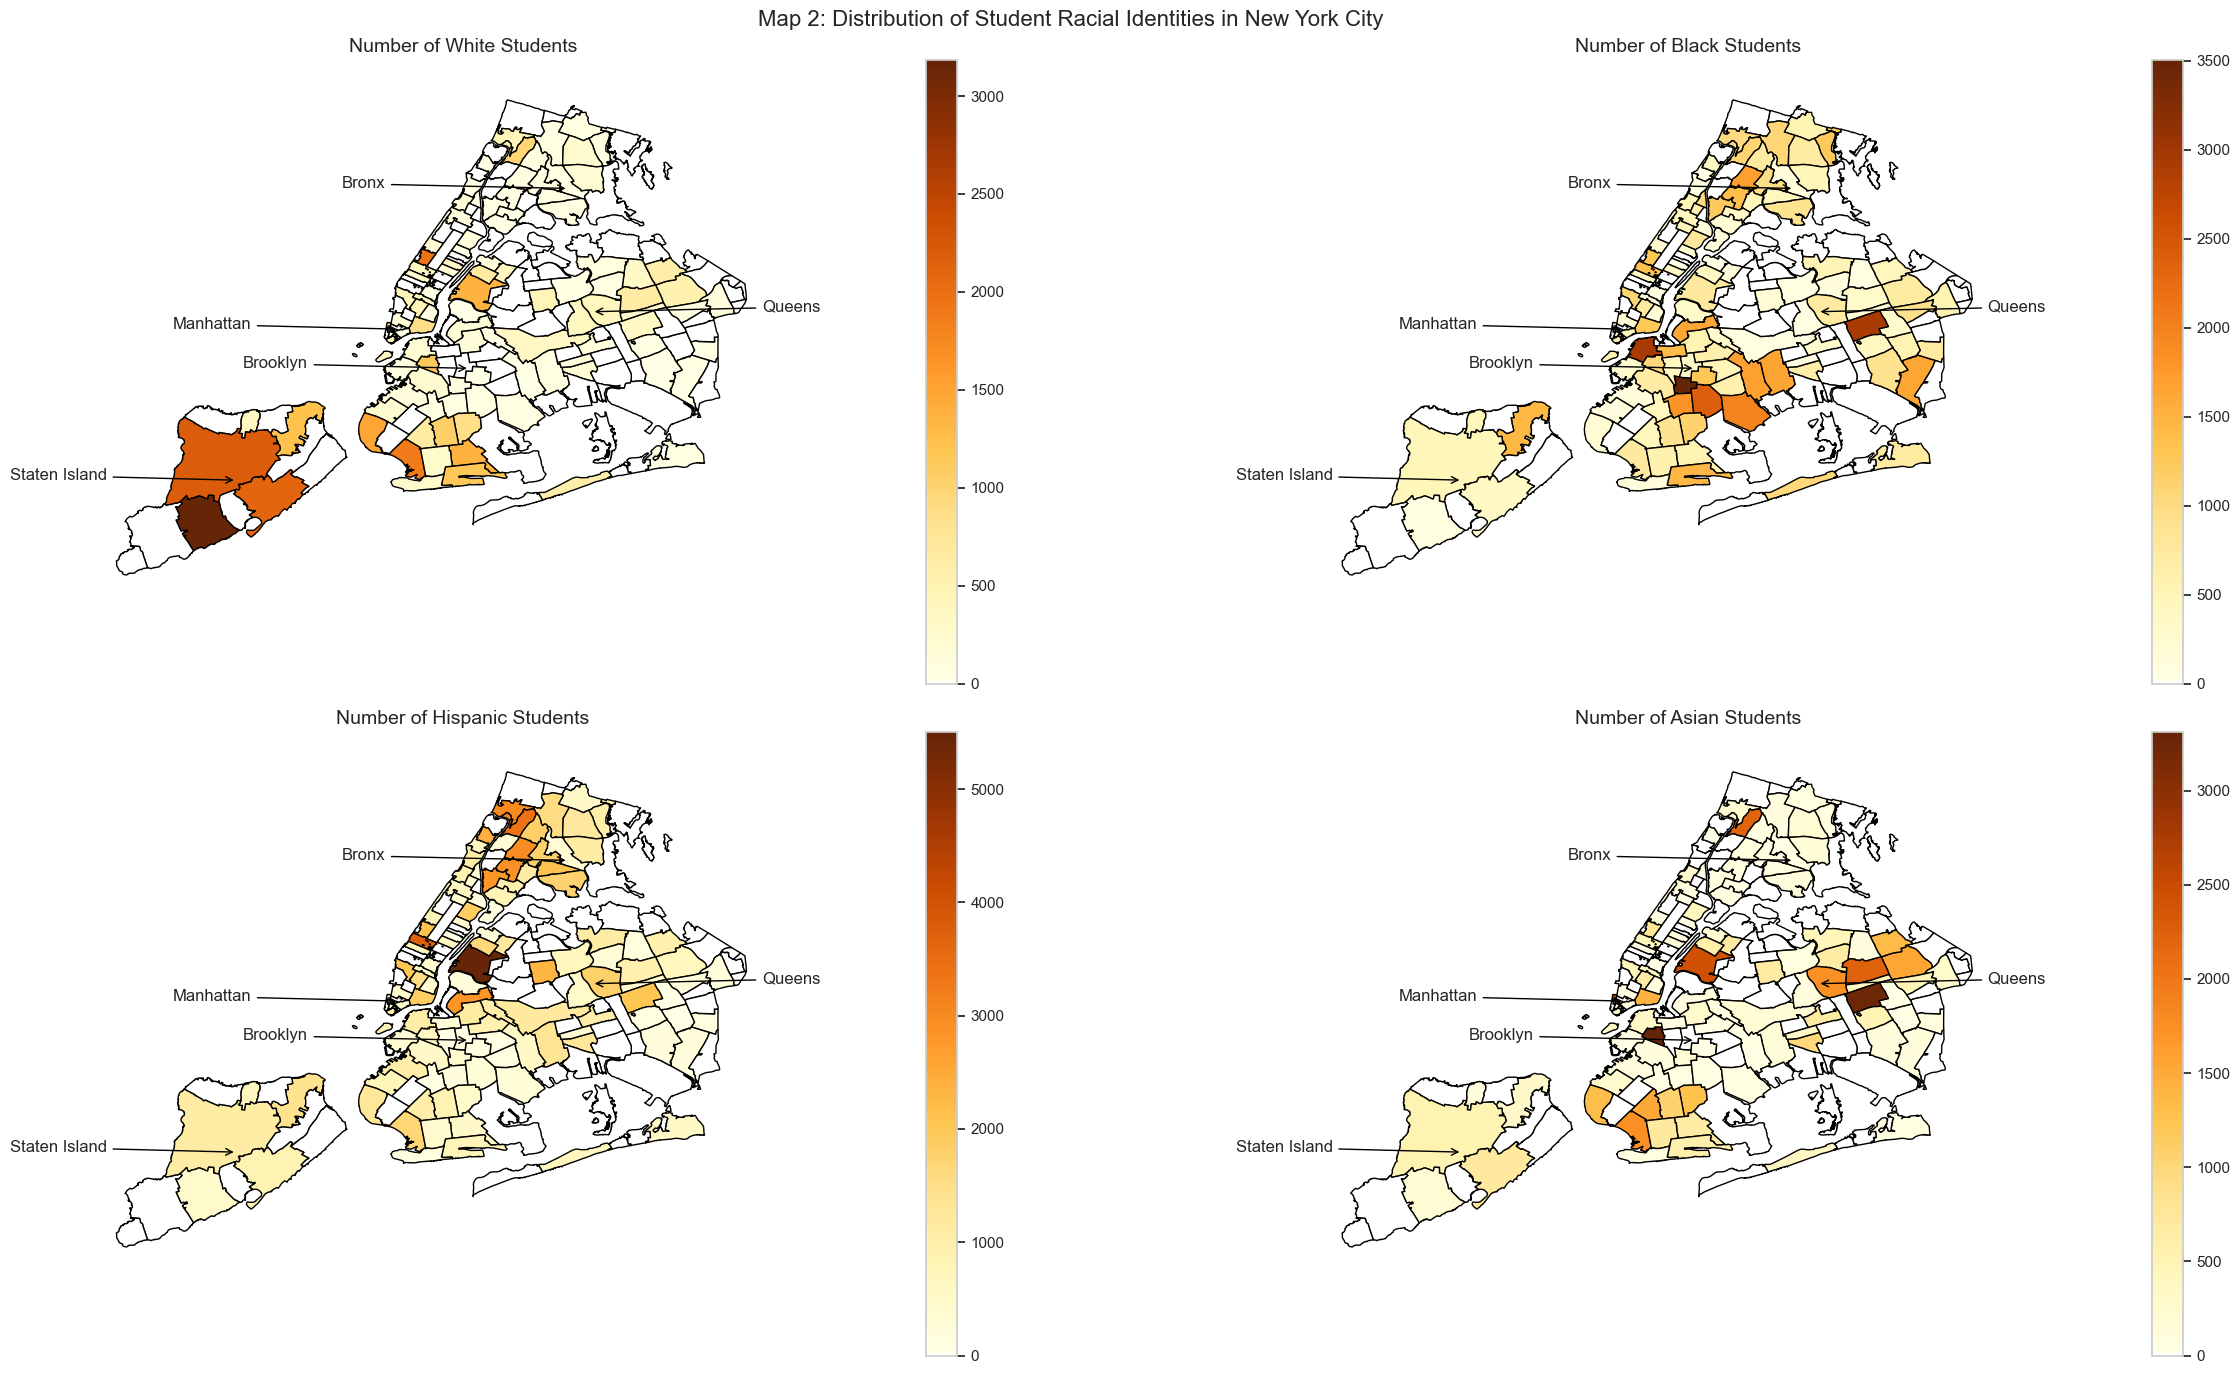

In [151]:
# Create the subplots
fig, axs = plt.subplots(2, 2, figsize=(26, 14))

# Plot for White Students
axs[0, 0].set_facecolor('white')
nyc_boroughs.plot(ax=axs[0, 0], edgecolor="black", facecolor="none")
merged_data_white.plot(ax=axs[0, 0], edgecolor="black", column='White_Students', cmap=cmap_combined, legend=True)
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim(ylim)
axs[0, 0].set_aspect('equal')
axs[0, 0].set_title("Number of White Students", fontsize=14)
axs[0, 0].set_xlabel("Longitude")
axs[0, 0].set_ylabel("Latitude")
axs[0, 0].axis("off")

# Plot for Black Students
axs[0, 1].set_facecolor('white')
nyc_boroughs.plot(ax=axs[0, 1], edgecolor="black", facecolor="none")
merged_data_black.plot(ax=axs[0, 1], edgecolor="black", column='Black_Students', cmap=cmap_combined, legend=True)
axs[0, 1].set_xlim(xlim)
axs[0, 1].set_ylim(ylim)
axs[0, 1].set_aspect('equal')
axs[0, 1].set_title("Number of Black Students", fontsize=14)
axs[0, 1].set_xlabel("Longitude")
axs[0, 1].set_ylabel("Latitude")
axs[0, 1].axis("off")

# Plot for Hispanic Students
axs[1, 0].set_facecolor('white')
nyc_boroughs.plot(ax=axs[1, 0], edgecolor="black", facecolor="none")
merged_data_hispanic.plot(ax=axs[1, 0], edgecolor="black", column='Hispanic_Students', cmap=cmap_combined, legend=True)
axs[1, 0].set_xlim(xlim)
axs[1, 0].set_ylim(ylim)
axs[1, 0].set_aspect('equal')
axs[1, 0].set_title("Number of Hispanic Students", fontsize=14)
axs[1, 0].set_xlabel("Longitude")
axs[1, 0].set_ylabel("Latitude")
axs[1, 0].axis("off")

# Plot for Asian Students
axs[1, 1].set_facecolor('white')
nyc_boroughs.plot(ax=axs[1, 1], edgecolor="black", facecolor="none")
merged_data_asian.plot(ax=axs[1, 1], edgecolor="black", column='Asian_Students', cmap=cmap_combined, legend=True)
axs[1, 1].set_xlim(xlim)
axs[1, 1].set_ylim(ylim)
axs[1, 1].set_aspect('equal')
axs[1, 1].set_title("Number of Asian Students", fontsize=14)
axs[1, 1].set_xlabel("Longitude")
axs[1, 1].set_ylabel("Latitude")
axs[1, 1].axis("off")

# Iterate over each borough and annotate it on the map
for borough, coords in borough_coords.items():
    if borough == 'Queens':
        axs[0, 0].annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[0, 1].annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[1, 0].annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[1, 1].annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
    else:
        axs[0, 0].annotate(borough, xy=coords, xytext=(coords[0] - 0.2, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[0, 1].annotate(borough, xy=coords, xytext=(coords[0] - 0.2, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[1, 0].annotate(borough, xy=coords, xytext=(coords[0] - 0.2, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[1, 1].annotate(borough, xy=coords, xytext=(coords[0] - 0.2, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
plt.suptitle("Map 2: Distribution of Student Racial Identities in New York City", fontsize=16)
plt.tight_layout()
plt.show()


After examining average SAT scores, I shifted my attention to understanding demographic variations in my explanatory variables. To identify unique areas where students of different racial identities may concentrate, I created four maps in Map 2 each illustrating the distribution of students by zip code. Unsurprisingly,  the distribution patterns align closely with the trends observed in the box plot from Graph 6. A high amount of white students gathered in Staten Island. Black students are predominantly in Brooklyn while Hispanic students, except for gathering in one particular zip code area in Brooklyn, take over the Bronx. Asian students are more dispersed, with a significant cluster of up to 2500 students in Manhattan. This phenomenon might be attributed to Manhattan having several elite public high schools that only admit students based on their test scores. These observations are consistent with the findings depicted in the box plots of Graph 6, providing further validation of the demographic distributions. 

Combining Map 2 with Map 1, it is generally the case where areas with outlying high SAT scores are associated with more white and Asian students. The Manhattan area where more than 3000 Asians are located also hosts similar numbers of students from other racial backgrounds. Interestingly, this corresponds to the area with the highest average SAT score on Map 1. Despite black and Hispanic students comprising a larger proportion of New York City public school populations, the disproportionate representation of white and Asian students in this particular area suggests a potential correlation between their presence and the high SAT scores observed.



In [95]:
# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load borough data for New York City
nyc_boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))
# Filter to include only New York City boroughs
nyc_boroughs = nyc_boroughs[nyc_boroughs['BoroName'].isin(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])]

# Load zip code data for New York City
nyc_zip_codes = gpd.read_file("C:/Users/35911/Downloads/zip_code_040114.geojson")

# Convert 'ZIPCODE' column in nyc_zip_codes to match the data type of 'zipcode' column in white_asian_per_zip and black_hispanic_per_zip
nyc_zip_codes['ZIPCODE'] = nyc_zip_codes['ZIPCODE'].astype(int)

# Group cleaned_score by zipcode and calculate the sum of white and Asian students for each zipcode
white_asian_per_zip = cleaned_score.groupby('Zip Code')['WhiteAsian'].sum().reset_index().round(0)
# Rename columns for consistency
white_asian_per_zip.columns = ['zipcode', 'WhiteAsian']

# Group cleaned_score by zipcode and calculate the sum of black and Hispanic students for each zipcode
black_hispanic_per_zip = cleaned_score.groupby('Zip Code')['BlackHispanic'].sum().reset_index().round(0)
# Rename columns for consistency
black_hispanic_per_zip.columns = ['zipcode', 'BlackHispanic']

# Left merge nyc_zip_codes with white_asian_per_zip and black_hispanic_per_zip
merged_data_white_asian = nyc_zip_codes.merge(white_asian_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')
merged_data_black_hispanic = nyc_zip_codes.merge(black_hispanic_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')

# Set NaN values to a default color (white)
merged_data_white_asian['WhiteAsian'].fillna(0, inplace=True)
merged_data_black_hispanic['BlackHispanic'].fillna(0, inplace=True)

# Define custom colormap
cmap = plt.cm.YlOrBr  # Original colormap
cmap_white = ListedColormap(['white'])  # Custom colormap for value 0 (white)
cmap_combined = ListedColormap(np.vstack((cmap_white(np.linspace(0, 1, 1)), cmap(np.linspace(0, 1, cmap.N-1)))))

# Set the plot extent
xlim = (-74.3, -73.6)
ylim = (40.4, 40.95)


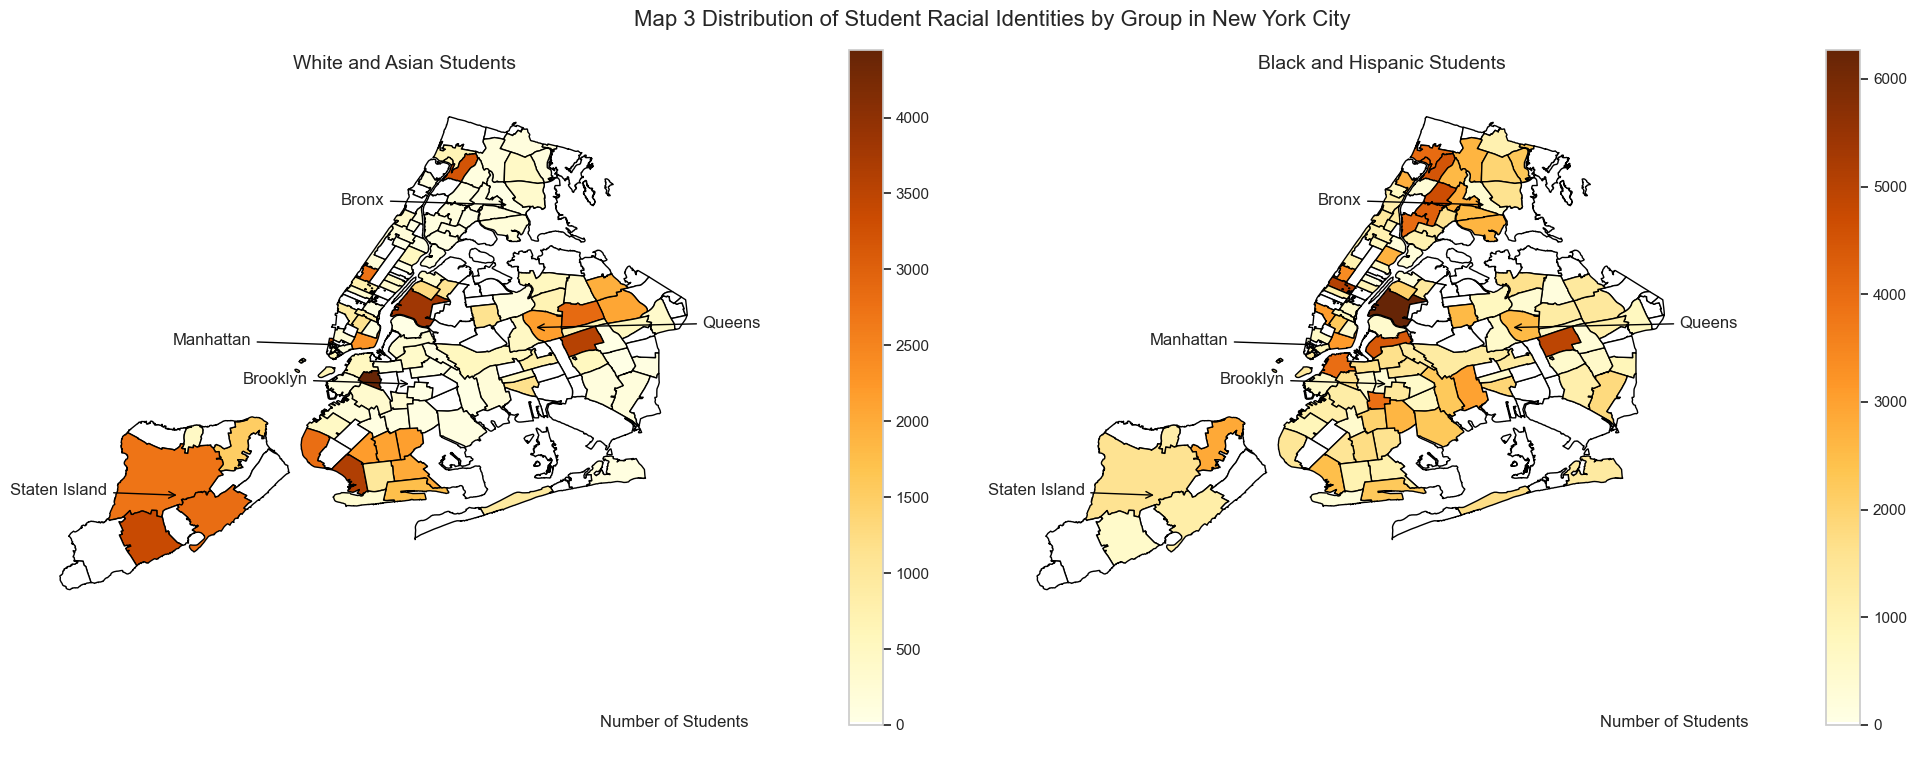

In [147]:
# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot for White and Asian Students
axs[0].set_facecolor('white')
nyc_boroughs.plot(ax=axs[0], edgecolor="black", facecolor="none")
merged_data_white_asian.plot(ax=axs[0], edgecolor="black", column='WhiteAsian', cmap=cmap_combined, legend=True)
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
axs[0].set_aspect('equal')
axs[0].set_title("White and Asian Students", fontsize=14)
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
axs[0].axis("off")
axs[0].annotate('Number of Students',xy=(0.30, 0.05),  xycoords='figure fraction')

# Plot for Black and Hispanic Students
axs[1].set_facecolor('white')
nyc_boroughs.plot(ax=axs[1], edgecolor="black", facecolor="none")
merged_data_black_hispanic.plot(ax=axs[1], edgecolor="black", column='BlackHispanic', cmap=cmap_combined, legend=True)
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)
axs[1].set_aspect('equal')
axs[1].set_title("Black and Hispanic Students", fontsize=14)
axs[1].set_xlabel("Longitude")
axs[1].set_ylabel("Latitude")
axs[1].axis("off")
axs[1].annotate('Number of Students',xy=(0.8, 0.05),  xycoords='figure fraction')

# Iterate over each borough and annotate it on the map
for borough, coords in borough_coords.items():
    if borough == 'Queens':
        axs[0].annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[1].annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
    else:
        axs[0].annotate(borough, xy=coords, xytext=(coords[0] - 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
        axs[1].annotate(borough, xy=coords, xytext=(coords[0] - 0.15, coords[1]), 
                        arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)


plt.suptitle("Map 3 Distribution of Student Racial Identities by Group in New York City", fontsize=16)
plt.tight_layout()
plt.show()


Building upon my previous findings regarding the consistent trends in the distribution of white and Asian students, as well as black and Hispanic students, I decided to measure their demographic variation collectively to observe broader patterns. I notice that this generally follows the trend detected earlier, with white and Asian students gathering in Staten Island and certain areas of each of the boroughs except the Bronx, while black and Hispanic students, representing a larger population, were dispersed across all areas, with a notable concentration in the Bronx. Similarly, areas in Map 3 with more white and Asian students tend to align with those exhibiting higher average test scores in Map 1. The detailed breakdown by area and link among the three maps further strengthen the notion that racial demographics may significantly influence academic performances in New York City. 



.






# 2.3 Merging with a New Dataset

To better understand the socioeconomic landscape and its potential impact on SAT scores, I use an area's property price as an estimate for the socioeconomic landscape. Therefore, a new dataset that recorded every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period from September 2016 to September 2017 is introduced (NYC Property Sales, n.d.). Using information from this dataset, I could observe the average property price of each zip code area and determine if wealthier areas are associated with higher SAT scores. 

I began by selecting the variable of interest "sale price", "gross square feet", and "zip code". I cleaned the dataset by removing all observations that have missing values or 0s in these variables of interest. After eliminating 55226 observations from the initial 84,549 observations, I continue my work with 29323 observations. Next, I proceeded to create "price per sqft" by dividing the "sale price" and "gross square feet." Lastly, I grouped all observations by zipcode and calculated the average price per square foot by zip code. 

In [1]:
import pandas as pd
file = r"C:\Users\35911\Desktop\ECO225 Project\Data\nyc-rolling-sales.csv"
rawnew = pd.read_csv(file)


In [2]:
# Replace '-' with NaN in specific columns
columns_to_clean = ['SALE PRICE', 'GROSS SQUARE FEET', 'ZIP CODE']
rawnew[columns_to_clean] = rawnew[columns_to_clean].replace('-', pd.NA)
rawnew[columns_to_clean] = rawnew[columns_to_clean].replace(0, pd.NA)

# Convert the data type of columns to numeric
rawnew[columns_to_clean] = rawnew[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in specified columns
cleaned_new = rawnew.dropna(subset=columns_to_clean)


In [3]:
# Calculate price per square foot
cleaned_new['PRICE PER SQFT'] = cleaned_new['SALE PRICE'] / cleaned_new['GROSS SQUARE FEET']

# Group by ZIP code and calculate the average price per square foot
average_price_per_sqft = cleaned_new.groupby('ZIP CODE')['PRICE PER SQFT'].mean().reset_index()

# Merge the datasets based on ZIP code
price_score = cleaned_score.merge(average_price_per_sqft, left_on = 'Zip Code', right_on = 'ZIP CODE', how = 'left')


C:\Users\35911\AppData\Local\Temp\ipykernel_78464\3925149739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new['PRICE PER SQFT'] = cleaned_new['SALE PRICE'] / cleaned_new['GROSS SQUARE FEET']


NameError: name 'cleaned_score' is not defined

In [ ]:
# Filter price_score to exclude observations with 0 or inf as price per sqft
filtered_price_score = price_score[(price_score['PRICE PER SQFT'] != 0) & np.isfinite(price_score['PRICE PER SQFT'])]

# Group filtered_price_score by zipcode and calculate the average SAT score for each zipcode
avg_price_per_zip = filtered_price_score.groupby('ZIP CODE')['PRICE PER SQFT'].mean().reset_index()
print(avg_price_per_zip().head())

In [4]:
# Filter price_score to exclude observations with 0 or inf as price per sqft
filtered_price_score = price_score[(price_score['PRICE PER SQFT'] != 0) & np.isfinite(price_score['PRICE PER SQFT'])]

# Group filtered_price_score by zipcode and calculate the average SAT score for each zipcode
avg_price_per_zip = filtered_price_score.groupby('ZIP CODE')['PRICE PER SQFT'].mean().reset_index()

# Rename columns for consistency
avg_price_per_zip.columns = ['zipcode', 'average_price']
# Load borough data for New York City
nyc_boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))
# Filter to include only New York City boroughs
nyc_boroughs = nyc_boroughs[nyc_boroughs['BoroName'].isin(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])]

# Load zip code data for New York City
nyc_zip_codes = gpd.read_file("C:/Users/35911/Downloads/zip_code_040114.geojson")

# Convert 'ZIPCODE' column in nyc_zip_codes to match the data type of 'zipcode' column in avg_price_per_zip
nyc_zip_codes['ZIPCODE'] = nyc_zip_codes['ZIPCODE'].astype(int)

# Left merge nyc_zip_codes with avg_price_per_zip
merged_data1 = nyc_zip_codes.merge(avg_price_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')

# Set NaN values to a default color (white)
merged_data1['average_price'].fillna(0, inplace=True)


NameError: name 'price_score' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Handle NaN, 0s, and infinite values in the 'average_price' column
smallest_non_zero = merged_data1['average_price'][merged_data1['average_price'] != 0].min()
largest_non_inf = merged_data1['average_price'][np.isfinite(merged_data1['average_price'])].max()

# Define custom colormap
cmap = plt.cm.Greens  # Original colormap
cmap_gray = ListedColormap(['gray'])  # Colormap for 0s and infinities
cmap_combined = ListedColormap(np.vstack((cmap_gray(np.linspace(0, 1, 1)), cmap(np.linspace(0, 1, cmap.N-1)))))

# Set the plot extent
xlim = (-74.3, -73.6)
ylim = (40.4, 40.95)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('white')  # Set background color of the axis to white
nyc_boroughs.plot(ax=ax, edgecolor="black", facecolor="none")  # Set facecolor to none for the boroughs

# Plot the map with colors based on average prices
merged_data1.plot(ax=ax, edgecolor="black", column='average_price', cmap=cmap_combined, legend=True, vmin=smallest_non_zero, vmax=largest_non_inf)

# Set the plot extent and aspect ratio
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal')

# Iterate over each borough and annotate it on the map
for borough, coords in borough_coords.items():
    if borough == 'Queens':
        plt.annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                     arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
    else:
        plt.annotate(borough, xy=coords, xytext=(coords[0] - 0.15, coords[1]), 
                 arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)

# Add text to indicate what is plotted
ax.annotate('Average Housing Price', xy=(0.54, 0.05),  xycoords='figure fraction')
plt.title("Map 4 Distribution of Housing Prices in New York City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("off")
plt.show()


NameError: name 'merged_data1' is not defined

In [6]:
# Define bounding box coordinates for Brooklyn and Bronx
brooklyn_bbox = (-73.9438, 40.595, -73.8334, 40.6981)  # (minx, miny, maxx, maxy)
bronx_bbox = (-73.9339, 40.7851, -73.7654, 40.9176)  # (minx, miny, maxx, maxy)

# Filter merged_data1 DataFrame for Brooklyn and Bronx based on bounding box coordinates
brooklyn_data = merged_data1.cx[brooklyn_bbox[0]:brooklyn_bbox[2], brooklyn_bbox[1]:brooklyn_bbox[3]]
bronx_data = merged_data1.cx[bronx_bbox[0]:bronx_bbox[2], bronx_bbox[1]:bronx_bbox[3]]

# Print data for Brooklyn
print("Data for Brooklyn:")
print(brooklyn_data.head())

# Print data for Bronx
print("\nData for Bronx:")
print(bronx_data.head(30))


NameError: name 'merged_data1' is not defined

In [7]:
import warnings
import geopandas as gpd
warnings.simplefilter(action='ignore', category=FutureWarning)
# Group cleaned_score by zipcode and calculate the average SAT score for each zipcode
avg_price_per_zip = price_score.groupby('ZIP CODE')['PRICE PER SQFT'].mean().reset_index()

# Rename columns for consistency
avg_price_per_zip.columns = ['zipcode', 'average_price']

# Load borough data for New York City
nyc_boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))
# Filter to include only New York City boroughs
nyc_boroughs = nyc_boroughs[nyc_boroughs['BoroName'].isin(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])]

# Load zip code data for New York City
nyc_zip_codes = gpd.read_file("C:/Users/35911/Downloads/zip_code_040114.geojson")

# Convert 'ZIPCODE' column in nyc_zip_codes to match the data type of 'zipcode' column in avg_price_per_zip
nyc_zip_codes['ZIPCODE'] = nyc_zip_codes['ZIPCODE'].astype(int)

# Left merge nyc_zip_codes with avg_price_per_zip
merged_data1 = nyc_zip_codes.merge(avg_price_per_zip, left_on='ZIPCODE', right_on='zipcode', how='left')

# Set NaN values to a default color (white)
merged_data1['average_price'].fillna(0, inplace=True)

# Define custom colormap+
cmap = plt.cm.Greens  # Original colormap
cmap_white = ListedColormap(['white'])  # Custom colormap for value 0 (white)
cmap_combined = ListedColormap(np.vstack((cmap_white(np.linspace(0, 1, 1)), cmap(np.linspace(0, 1, cmap.N-1)))))

# Set the plot extent
xlim = (-74.3, -73.6)
ylim = (40.4, 40.95)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('white')  # Set background color of the axis to white
nyc_boroughs.plot(ax=ax, edgecolor="black", facecolor="none")  # Set facecolor to none for the boroughs

# Plot the map with colors based on SAT scores
merged_data1.plot(ax=ax, edgecolor="black", column='average_price', cmap=cmap_combined, legend=True)

# Set the plot extent and aspect ratio
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal')
# Iterate over each borough and annotate it on the map
for borough, coords in borough_coords.items():
    if borough == 'Queens':
        plt.annotate(borough, xy=coords, xytext=(coords[0] + 0.15, coords[1]), 
                     arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)
    else:
        plt.annotate(borough, xy=coords, xytext=(coords[0] - 0.15, coords[1]), 
                 arrowprops=dict(facecolor='green', arrowstyle='->', edgecolor='black'), fontsize=12)

# Add text to let people know what we are plotting
ax.annotate('Average Housing Price',xy=(0.54, 0.05),  xycoords='figure fraction')
plt.title("Map 4 Distribution of Housing Prices in New York City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("off")
plt.show()


NameError: name 'price_score' is not defined

In Map 4, I categorized the average housing prices across each zip code, revealing notable disparities throughout New York City. Upon analyzing the relationship between average SAT scores and housing prices, it becomes evident that there isn't a strong correlation between the two variables apart from Manhattan. Most areas' average price per square foot is around \\$500. However, Manhattan exhibits an abnormally high housing price compared to the rest of the city. In certain wealthy neighbourhoods in Manhattan, the average prices are as high as \\$2500. The most expensive area in Manhattan with housing prices more than \$3000 interestingly is also the area with the highest average score in Map 1. Along with the high prices in Manhattan, several areas in Brooklyn bordering Manhattan also exhibit high housing prices. Manhattan, being a global hub for wealth and luxury, exhibiting such remarkable housing costs is not surprising. Given that affluent individuals in Manhattan can afford top-notch education resources and teachers, it is logical for Manhattan to have the most number of outliers in high average SAT scores in the cities. Interestingly, Staten Island, with the highest median SAT scores and a majority of white students appears to have low housing prices. This scenario can be attributed to its geographical isolation being an island, housing availability, and other local economic characteristics.


## 2.4 Conclusion

This study seeks to unravel the relationship between student racial demographics and academic achievements in New York City. Utilizing data about SAT scores in New York City public schools, I explored various racial demographics and their impact on average SAT scores across areas in New York City by zip code. We notice higher proportions of white and Asian students are consistently associated with higher academic performance, while a higher share of other races tend to demonstrate lower average SAT scores. In addition, our investigation of zip code-level performance indicates complex education disparities across different neighbourhoods. The highest average SAT score belongs to a Manhattan school while the lowest goes to the Bronx. This result emphasizes the need to ensure that every student, regardless of their race or location, should have access to quality education. 

Our study extends beyond racial demographics to related factors such as school size and the socioeconomic status where the school is located. I found that larger schools are more likely to have higher average SAT scores. This finding suggests that larger schools may be exposed to better resources.
It is also observable that affluent areas in Manhattan with remarkably above-average housing prices are associated with above-average SAT scores. These findings contribute to a broader discourse on education disparities.

One caveat of this study is the limit in data we have in hand. The analysis would be more comprehensive and the results would be more convincing if we could retrieve data from multiple years instead of one year. However, given the currently available data, the analyses performed are highly valuable. 

In the subsequent stages of this study, I aim to delve deeper into the average SAT scores by breaking them down into subcategories of math, reading, and writing. By doing so, I intend to investigate whether racial groups perform differently on these specific components of the SAT. Additionally, I plan to conduct a more detailed analysis to explore correlation within that particular affluent Manhattan area. This area, marked by substantial white and Asian students, high housing prices, and notably high SAT scores, merits further investigation to uncover the underlying drivers of these trends.

In conclusion, my findings reveal that regardless of the policymakers' current efforts, education disparities are still very much present in society. The study sheds light on the relationship between demographic factors and education outcomes, along with its covariates. Understanding the importance of this is essential in creating and maintaining a more equitable education system that provides every student with the same opportunities to succeed. 











## 2.5 Reference

Bonastia, C. (2023, March 6). Segregation in New York City Schools Continues. THIRTEEN - New York Public Media. https://www.thirteen.org/blog-post/segregation-new-york-city-schools-continues/gazetteterrymurphy. (2023, November 22).

Boroughs of New York City. (2020, August 24). Wikipedia. https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

Card, D., & Rothstein, J. (2007). Racial segregation and the black–white test score gap. Journal of Public Economics, 91(11-12), 2158–2184. https://doi.org/10.1016/j.jpubeco.2007.03.006

Di, M., Kinga, C., Di, W., Fenelon, C., Flood, K., Milborn, E., & Rodriguez, C. (2021). Public and private school segregation in New York City. https://files.eric.ed.gov/fulltext/ED613612.pdf

Everson, H. T., & Millsap, R. E. (2004). Beyond individual differences: Exploring school effects on SAT scores. Educational Psychologist, 39(3), 157–172. https://doi.org/10.1207/s15326985ep3903_2

Harris, E. A., & Hu, W. (2018, June 5). Asian groups see bias in plan to diversify New York’s elite schools. The New York Times. https://www.nytimes.com/2018/06/05/nyregion/carranza-specialized-schools-admission-asians.html

How have links between neighborhood poverty and education outcomes changed over time? | NYU Steinhardt. Steinhardt.nyu.edu. https://steinhardt.nyu.edu/research-alliance/research/spotlight-nyc-schools/how-have-links-between-neighborhood-poverty-and

Kemple, J., Farley, C., & Stewart, K. (2019). Wide gap in SAT/ACT test scores between wealthy, lower-income kids. Harvard Gazette. https://news.harvard.edu/gazette/story/2023/11/new-study-finds-wide-gap-in-sat-act-test-scores-between-wealthy-lower-income-kids/

New York City Department of Education data shows racial, ethnic disparities within elite public high schools - CBS New York. Www.cbsnews.com. https://www.cbsnews.com/newyork/news/nyc-specialized-high-schools-racial-disparities/

NYC Open Data. (n.d.). Average SAT Scores for NYC Public Schools. Www.kaggle.com. https://www.kaggle.com/datasets/nycopendata/high-schools

NYC Property Sales. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

NYC Zip Code Tabulation Areas - ZIP_CODE_040114.geojson - BetaNYC’s Community Data Portal. (n.d.). Data.beta.nyc. Retrieved February 28, 2024, from https://data.beta.nyc/en/dataset/nyc-zip-code-tabulation-areas/resource/894e9162-871c-4552-a09c-c6915d8783fb

Penney, J. (2017). Racial interaction effects and student achievement. Education Finance and Policy, 12(4), 447–467. https://doi.org/10.1162/edfp_a_00202